### KDT
#### 1. Python 데이터분석: 예측모델 개발

- 강사: 최가람, 천재교육 AI센터 데이터기획분석팀원
- 주요 업무: 이탈 예측, 추천 (도서, 콘텐츠) 모델 개발 및 운영, 데이터 분석 업무

- 일정: 2023.8.07 ~ 8.08
<p>

- 교육내용
    - <b>이탈 예측 모델 개념 및 활용 데이터 설명</b>
    - <b>데이터 전처리 모듈 개발</b>
    - <b>분석 모델링 개발 실습 1 (Logistic Regression, LGBM)</b>
    - 분석 모델링 개발 실습 2 (Logistic Regression, LGBM)
    - 성능 지표 개념 (Confusion Matrix)
    - 모델 성능 결과 분석
    - 모델 최적화
<p>

- 교육목표
    - 온라인 교육 서비스를 이용하고 있는 유저들의 이력을 바탕으로 이탈 여부를 예측할 수 있는 모델을 개발해보자
    - 통합학년 이탈 예측 모델 구성
    - 학년 별 이탈 예측 모델 구성
    - 구매/재구매 별 이탈 예측 모델 구성
    - 과제) 이탈 예측 모델 개발: 활용 데이터 간략 설명, 예측 모델(logistic, DCT, Xgboost, LGBM 등등) 구성, ** 성능 지표를 통한 결과 설명 **

#### 5. 최적화

##### 5-1 LGBM Optimization (Grid Search, Bayesian Optimization)

In [1]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# 데이터 읽어오기 (1학년 기준)
import pandas as pd
churn_data = pd.read_csv('C:/Users/hslio/Desktop/Github/Genia/Study/data/churn_data.csv')
churn_data = churn_data.fillna(0)
churn_data = churn_data.drop(columns =['number'])
grade_dict = {'G015': 5, 'G013': 3, 'G014': 4, 'G011': 1, 'G012': 2, 'G016': 6}
churn_data['grade'] = churn_data['grade_sect_cd'].apply(lambda x : grade_dict[x])
grade_df = churn_data[churn_data['grade'] == 1]
grade_df.head()

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1


In [3]:
# 데이터 준비 (X, y)
X = grade_df[['tmon_pchrg_lrn_dcnt', 
'acmlt_pchrg_lrn_dcnt', 
'acmlt_bilclct_amt', 
'correct_rate_avg', 
'learning_time_avg',
'media_action_cnt_sum',
'non_video_viewed_cnt_sum']]

y = grade_df['label']

# 데이터를 학습용과 검증용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 기본 모델 성능 확인
raw_model = LGBMClassifier(random_state=0, verbose=-1)
raw_model.fit(X_train, y_train)
y_pred = raw_model.predict(X_test)

# precision, recall, fscore
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.896551724137931, 0.7428571428571429, 0.8125, None)

In [7]:
### GridSearch로 최적화 하기
from sklearn.model_selection import GridSearchCV


# LightGBM 모델 생성
model = LGBMClassifier(verbose=-1)

# 하이퍼파라미터 범주 설정
param_grid = {'max_depth' : [3, 5, 7],
              'num_leaves' : [10, 20, 30],
              'min_child_samples' : [10, 20, 30],
              'learning_rate' : [0.01, 0.05, 0.1]}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)

# 그리드 최적화
# 갖고 있는 데이터로 최적의 값을 찾게 된다
grid_search.fit(X_train, y_train) 

# 최적의 하이퍼파라미터
grid_search.best_params_

# 최적의 하이퍼파라미터로 학습된 모델 가져오기
best_model = grid_search.best_estimator_

# 예측 수행
y_pred = best_model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='binary')


(0.9615384615384616, 0.7142857142857143, 0.819672131147541, None)

In [75]:
### Bayesian으로 최적화 하기

import lightgbm as lgb
from bayes_opt import BayesianOptimization

# 하이퍼파라미터 범주 설정
param_bayesian = {'max_depth' : (3,7),
                  'num_leaves' : (10, 30),
                  'min_child_samples' : (10, 30),
                  'learning_rate' : (0.01, 0.1)}

# Objective Function 설정
def lgbm_objective(num_leaves, learning_rate, max_depth, min_child_samples):
    
    params= {'num_leaves' : int(num_leaves),
             'learning_rate' : learning_rate,
             'max_depth' : int(max_depth),
             'min_child_samples' : int(min_child_samples),
             'objective' : 'binary',
             'metric' : 'binary_logloss',}
    
    # LightGBM 모델 생성 및 학습
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    model = lgb.train(params, train_data, valid_sets=[valid_data])

    return -model.best_score['valid_0']['binary_logloss']

# Bayesian Optimization 객체 생성
optimizer = BayesianOptimization(f=lgbm_objective, pbounds=param_bayesian, random_state=777)

# 베이시안 최적화                  # 학습 수
optimizer.maximize(init_points=10, n_iter=30)

# 최적의 하이퍼파라미터
print(optimizer.max)

# 최적의 하이퍼파라미터로 LGBMClassifier 모델 학습
best_params = optimizer.max['params']
best_num_leaves = int(best_params['num_leaves'])
best_learning_rate = best_params['min_child_samples']
best_max_depth = int(best_params['min_child_samples'])
best_min_childe_samples = int(best_params['min_child_samples'])

best_model = LGBMClassifier(num_leaves=best_num_leaves,
                            learning_rate=best_learning_rate,
                            max_depth=best_max_depth,
                            min_child_samples=best_min_childe_samples,
                            objective='binary',
                            verbose=-1)
# parameter tuning이 된 모델로 학습을 진행한다
best_model.fit(X_train, y_train)

# 예측 수행
y_pred = best_model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='binary')

|   iter    |  target   | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 111, number of negative: 189
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370000 -> initscore=-0.532217
[LightGBM] [Info] Start training from score -0.532217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.618653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.605646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.593275
[LightGBM] [Warning] 

(0.84375, 0.84375, 0.84375, None)

precision을 올릴지, recall값을 올릴지 어떤 부분이 달라질지 비즈니스 포인트에 따라 생각해라
- precision : 이탈한다고 했는데, 이탈 안한 경우
- recall : 이탈안한다고 했는데, 이탈한 경우

In [ ]:
# raw_model : (0.896551724137931, 0.7428571428571429, 0.8125, None)
# grid_model : (0.9615384615384616, 0.7142857142857143, 0.819672131147541, None)
# bayesian model : (0.2980769230769231, 0.8857142857142857, 0.4460431654676259, None)

##### 5-2 [부록] Logisitc Regression cutoff 최적화

데이터셋 출처: https://www.kaggle.com/datasets/mdwasimakhtar03/social-network-adscsv

성능개선을 위한 cutoff 라인 변경: https://stackoverflow.com/questions/48882485/can-we-change-the-default-cut-off0-5-taken-by-logistic-regression-and-not-whil

In [22]:
import pandas as pd
# 데이터 "Social_Network_Ads.csv" 읽어오기
df = pd.read_csv('C:/Users/hslio/Desktop/Github/Genia/Study/data/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [25]:
# 데이터 살펴보기
df.Purchased.unique()
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

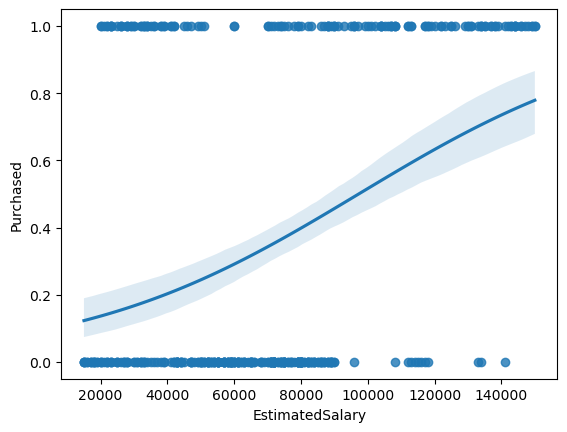

In [31]:
# plot logistics curve
# sns.regplot 활용
import seaborn as sns
sns.regplot(x=df['EstimatedSalary'], y=df['Purchased'], logistic=True)

In [35]:
# 데이터 가져오기, Train, Test 데이터 분리하기

# X : Age, EstimatedSalary
# Y : Purchased

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [36]:
# 모델 학습
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=7)
clf.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [39]:
# Predict 값 도출
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [40]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
sc = StandardScaler()

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
# 모델 재훈련
clf = LogisticRegression(random_state=7)
clf.fit(X_train, y_train)

# 재예측
y_pred = clf.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

[1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0]


array([[60,  8],
       [ 6, 26]], dtype=int64)

In [48]:
# cmtx 라벨 구성
cmtx = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1, 0]),
                                     index=['True : Purchased(1)', 'True : Purchased(0)'],
                                     columns=['Pred : Purchased(1)', 'Pred : Purchased(0)'])
cmtx

,Pred : Purchased(1),Pred : Purchased(0)
True : Purchased(1),26,6
True : Purchased(0),8,60


<Axes: >

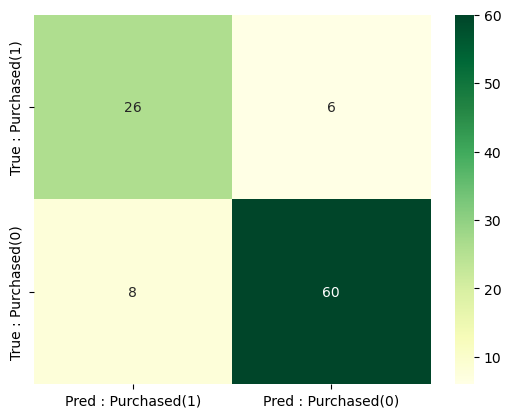

In [50]:
sns.heatmap(cmtx, annot=True, cmap='YlGn')

In [51]:
# accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.86

In [56]:
# precision_recall_f1 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.7647058823529411, 0.8125, 0.787878787878788, None)

In [64]:
# 결과(라벨)만 볼 때:

# 라벨에 따른 확률 값을 보고 싶을 때:
prob = clf.predict_proba(X_test)
prob

# y = 1 일 확률 값을 보고 싶을 때:
prob1 = clf.predict_proba(X_test)[:, 1]
prob1

array([0.77689615, 0.01623559, 0.25075612, 0.13026081, 0.58114501,
       0.48244517, 0.97032646, 0.26329053, 0.98209162, 0.12934066,
       0.00948631, 0.81463178, 0.01540755, 0.90406704, 0.52203641,
       0.93304468, 0.30322426, 0.07064259, 0.52988164, 0.78579125,
       0.09641073, 0.03695153, 0.46472687, 0.3439122 , 0.10520885,
       0.18171583, 0.82269311, 0.09664754, 0.1658323 , 0.224058  ,
       0.40428862, 0.01100794, 0.22500361, 0.45381905, 0.00819532,
       0.89732625, 0.00302752, 0.97001211, 0.74381611, 0.10419069,
       0.05396764, 0.00586803, 0.10419069, 0.35476726, 0.37310396,
       0.75230469, 0.05674859, 0.32710697, 0.02646707, 0.07432513,
       0.02843643, 0.54282979, 0.53664014, 0.36451497, 0.88612335,
       0.76754122, 0.97040455, 0.5721377 , 0.0737666 , 0.10546476,
       0.04789074, 0.71997642, 0.30437292, 0.944691  , 0.02359715,
       0.18090967, 0.34821378, 0.76286361, 0.44469001, 0.82053918,
       0.91984172, 0.04545361, 0.02446238, 0.6918402 , 0.32710

In [ ]:
# default 0.5 가 아닌 다른 cutoff 포인트를 고려해 보기

In [66]:
# Logistic Regression 모델 cutoff 최적화 하기
cutoff = 0.47 # 임의의 cutoff 값 설정
y_pred = [1 if i >= cutoff else 0 for i in prob1]
acc = accuracy_score(y_test, y_pred)
pre, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(acc, pre, rec, f1)

0.87 0.7714285714285715 0.84375 0.8059701492537314


In [69]:
# 목적함수(objective function)를 정의 : Accuracy 기준
def objective_func(cutoff):
    y_pred_cut = [1 if i >= cutoff else 0 for i in prob1]
    return(1-accuracy_score(y_test, y_pred_cut))

# minimize 함수에 적용을 위해 1-accuracy, 즉, 오류율 값으로 리턴한다.
print('정확도 : ', 1 - objective_func(0.5))

정확도 :  0.86


In [72]:
# 목적함수를 opt 모델에 적용
from scipy.optimize import minimize

opt_res = minimize(objective_func, 1, method='Nelder-Mead', options={'disp':True})
print('최적의 cutoff : ', opt_res.x)
print('정확도 (accuracy) : ', 1-opt_res.fun)

Optimization terminated successfully.
         Current function value: 0.110000
         Iterations: 15
         Function evaluations: 35
최적의 cutoff :  [0.53125]
정확도 (accuracy) :  0.89


Text(0, 0.5, 'accuracy_inversed_results')

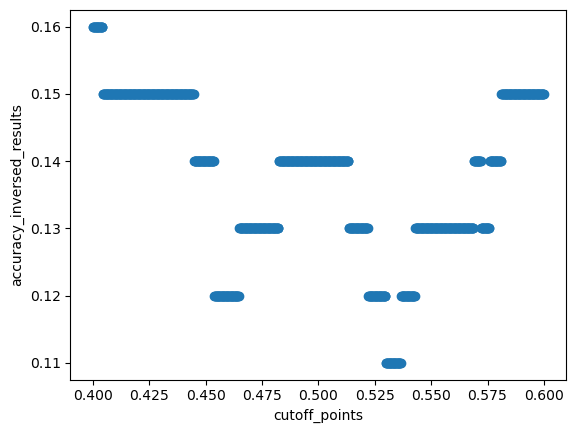

In [74]:
# cutoff 별 1-accuracy 값 시각화
import numpy as np
import matplotlib.pyplot as plt
# (plt.scatter 이용)

cutoff_points = np.linspace(0.4, 0.6, 1000)
accuracy_inversed_results = [objective_func(cutoff) for cutoff in cutoff_points]

plt.scatter(x=cutoff_points, y=accuracy_inversed_results)
plt.xlabel('cutoff_points')
plt.ylabel('accuracy_inversed_results')